In [4]:
pip install astroquery

  Created wheel for astroquery: filename=astroquery-0.4.1-py3-none-any.whl size=3831877 sha256=4c760621b525c2771f5cd2c876017c34558d1d78b2dee2468526972b98e4c17c
  Stored in directory: c:\users\pietrobernardo\appdata\local\pip\cache\wheels\59\74\e3\a457b9b06b2cf6a0126f316459030ee535cfaa95a69bbcc36f
Successfully built astroquery
Note: you may need to restart the kernel to use updated packages.


<IPython.core.display.Javascript object>


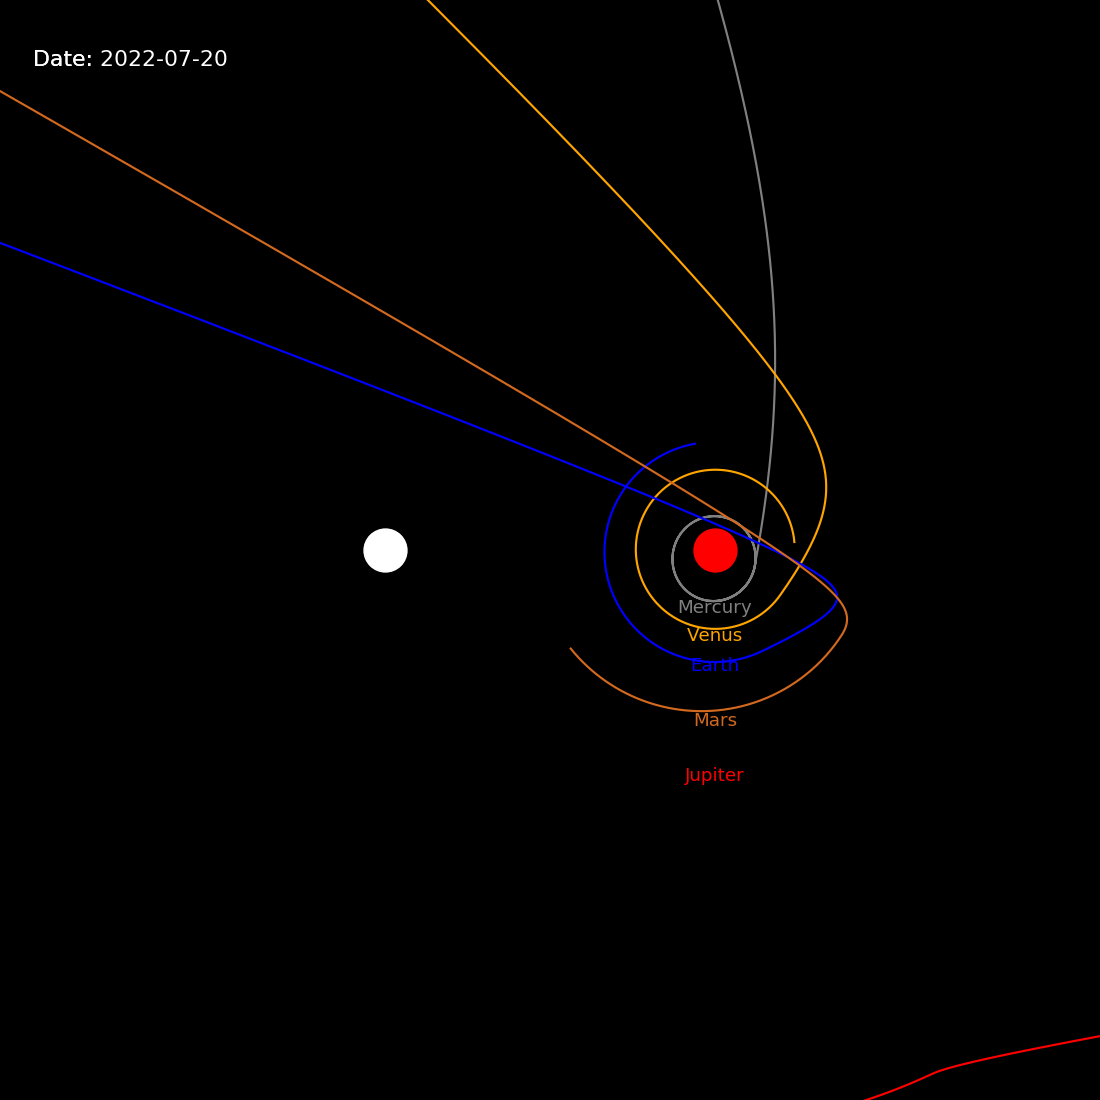

In [5]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from astropy.time import Time
from astroquery.jplhorizons import Horizons
from math import sqrt
from math import cos
from math import sin
from math import pi
from math import acos


sim_start_date = "2020-01-01"     
sim_duration = 365*2              
m_earth = 5.9722e24 / 1.98847e30  
m_moon = 7.3477e22 / 1.98847e30
G_constant = 1.980e-11
m_sun = 1
m_blackhole = 1
m_array = [3.28e23/1.989e30,
           4.86e24/1.989e30,
           5.97e24/1.989e30,
           6.39e23/1.989e30,
           1,898e27/1.989e30]

class Object:                   
    def __init__(self, name, rad, color, r, v, mass):
        self.name = name
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.mass = mass
        self.plot = ax.scatter(r[0], r[1], color=color, s=rad**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)
       

class SolarSystem:
    def __init__(self, thesun=None, the_bl=None):
        self.thesun = thesun
        self.bl = the_bl
        self.planets = []
        self.time = 0
        self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self):           
        dt = 1.0
        self.time += dt
        plots = []
        lines = []
        for p in self.planets:
            p.r += p.v * dt
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            plots.append(p.plot)
            lines.append(p.line)
        self.timestamp.set_text('Date: ' + Time(self.time, format='jd', out_subfmt='date').iso)
       
        return plots + lines + [self.timestamp]
   
    def evolve_new_sun(self):           
        dt = 1.0
        self.time += dt
        plots = []
        lines = []
   
        
        for p in self.planets:
           
           
            delta_x_1_2 = p.xs[-1]
            delta_y_1_2 = p.ys[-1]    
           
           
            r1 = sqrt(delta_x_1_2**2 + delta_y_1_2**2)
           
            vector_x_1_2 = delta_x_1_2/r1
            vector_y_1_2 = delta_y_1_2/r1
           
            F_1 = G_constant*m_sun*p.mass/(r1**2)
           
            delta_x_2_3 = -3+ p.xs[-1]
            delta_y_2_3 = 0 + p.ys[-1]
           
            r2 = sqrt(delta_x_2_3**2 + delta_y_2_3**2)
           
            vector_x_2_3 = delta_x_2_3/r2
            vector_y_2_3 = delta_y_2_3/r2
           
            F_2 = G_constant*m_sun*p.mass/(r2**2)
           
            F_3_x = F_1*vector_x_1_2 + F_2*vector_x_2_3
            F_3_y = F_1*vector_y_1_2 + F_2*vector_y_2_3
           
            F_3_modulo = sqrt(F_3_x**2 + F_3_y**2)
           
            F_3_x_normalizzata = F_3_x/F_3_modulo
            F_3_y_normalizzata = F_3_y/F_3_modulo
           
            #alpha = acos(((r1**2) + (r2**2) - 3) / 2*r1*r2)
           
            #r_risultante = sqrt((delta_x_1_2 + delta_x_2_3)**2 + (delta_y_1_2 + delta_y_2_3)**2)
           
            r_ris_x = (delta_x_1_2 + delta_x_2_3)
            r_ris_y = (delta_y_1_2 - delta_y_2_3)
            r_ris = sqrt(r_ris_x**2 + r_ris_y**2)
           
           
            p.r[0] += p.v[0] * dt
            
            acc_x = 2.959e-4 * r_ris_x / np.sum(r_ris**2)**(3./2)  # in units of AU/day^2
            p.v[0] += acc_x * dt
           
            p.r[1] += p.v[1] * dt
            
            acc_y = 2.959e-4 * r_ris_y / np.sum(r_ris**2)**(3./2)  # in units of AU/day^2
            p.v[1] += acc_y * dt
           
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
           
            p.plot.set_offsets(p.r[:2])

            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            plots.append(p.plot)
            lines.append(p.line)
        self.timestamp.set_text('Date: ' + Time(self.time, format='jd', out_subfmt='date').iso)
        
        return plots + lines + [self.timestamp]



plt.style.use('dark_background')
fig = plt.figure(figsize=[10, 10])
ax = plt.axes([0., 0., 1., 1.], xlim=(-6.5, 3.5), ylim=(-5, 5))
ax.set_aspect('equal')
ax.axis('off')

bl = SolarSystem(Object('Blackhole', 28, 'white', [-3,0,0], [0,0,0], m_blackhole))
ss = SolarSystem(Object("Sun", 28, 'red', [0, 0, 0], [0, 0, 0], m_sun))

ss.time = Time(sim_start_date).jd
colors = ['gray', 'orange', 'blue', 'chocolate', 'red']
sizes = [0.38, 0.95, 1., 0.53, 1.5]
names = ['Mercury', 'Venus', 'Earth', 'Mars', "Jupiter"]
texty = [.47, .73, 1, 1.5, 2]

for i, nasaid in enumerate([1, 2, 3, 4, 5]):  # The 1st, 2nd, 3rd, 4th planet in solar system
    obj = Horizons(id=nasaid, location="@sun", epochs=ss.time, id_type='id').vectors()
    ss.add_planet(Object(nasaid, 20 * sizes[i], colors[i],
                         [np.double(obj[xi]) for xi in ['x', 'y', 'z']],
                         [np.double(obj[vxi]) for vxi in ['vx', 'vy', 'vz']], m_array[i]))
    ax.text(0, - (texty[i] + 0.1), names[i], color=colors[i], zorder=1000, ha='center', fontsize='large')
    
for i in range(200):
    ss.evolve()

def animate(i):
    return ss.evolve_new_sun()

def animate_1(i):
    return ss.evolve()

ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=30,)
